In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
ms = pd.read_csv("C:/Users/SAHIL/Downloads/Mall_Customers.csv")

In [3]:
ms.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
ms.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
ms.shape

(200, 5)

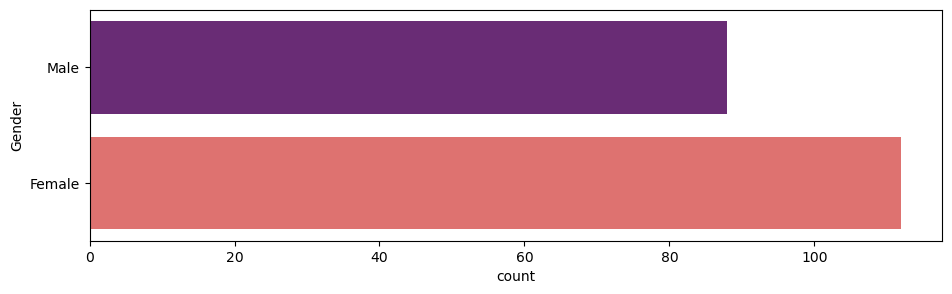

In [46]:
plt.figure(figsize=(11,3))
sns.countplot(y='Gender',data=ms, palette= 'magma')
plt.show()

In [6]:
X= ms.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

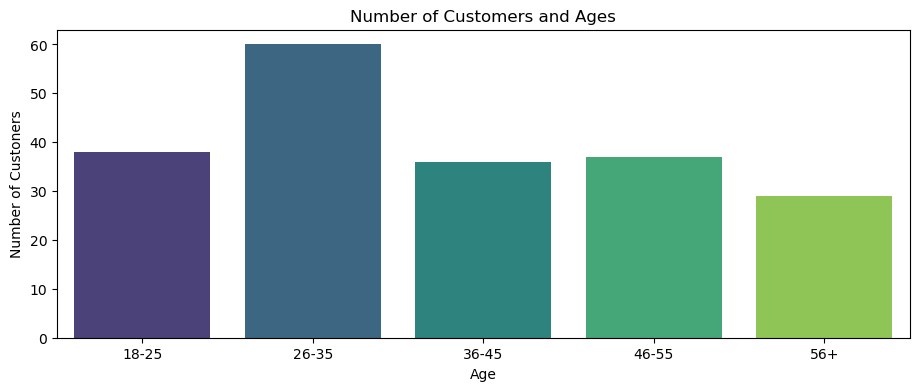

In [48]:
ag1= ms.Age[(ms.Age >= 18) & (ms.Age <= 25)]
ag2= ms.Age[(ms.Age >= 26) & (ms.Age <= 35)]
ag3= ms.Age[(ms.Age >= 36) & (ms.Age <= 45)]
ag4= ms.Age[(ms.Age >= 46) & (ms.Age <= 55)]
ag5= ms.Age[ms.Age >= 56]

ax = ['18-25','26-35','36-45','46-55','56+']
ay = [len(ag1.values),len(ag2.values),len(ag3.values),len(ag4.values),len(ag5.values)]

plt.figure(figsize=(11,4))
sns.barplot(x=ax,y=ay,palette= 'viridis')
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

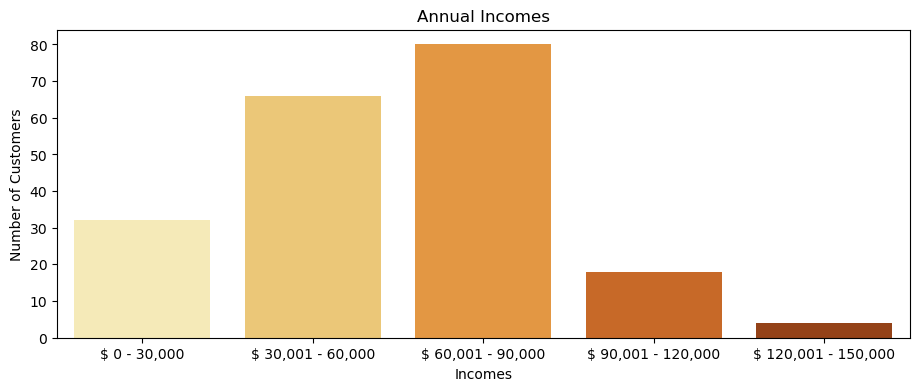

In [57]:
ai1= ms['Annual Income (k$)'][(ms['Annual Income (k$)'] >= 0) & (ms['Annual Income (k$)'] <= 30)]
ai2= ms['Annual Income (k$)'][(ms['Annual Income (k$)'] >= 31) & (ms['Annual Income (k$)'] <= 60)]
ai3= ms['Annual Income (k$)'][(ms['Annual Income (k$)'] >= 61) & (ms['Annual Income (k$)'] <= 90)]
ai4= ms['Annual Income (k$)'][(ms['Annual Income (k$)'] >= 91) & (ms['Annual Income (k$)'] <= 120)]
ai5= ms['Annual Income (k$)'][(ms['Annual Income (k$)'] >= 121) & (ms['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30,000','$ 30,001 - 60,000','$ 60,001 - 90,000','$ 90,001 - 120,000','$ 120,001 - 150,000']
aiy = [len(ai1.values),len(ai2.values),len(ai3.values),len(ai4.values),len(ai5.values)]

plt.figure(figsize=(11,4))
sns.barplot(x=aix,y=aiy,palette= 'YlOrBr')
plt.title("Annual Incomes")
plt.xlabel("Incomes")
plt.ylabel("Number of Customers")
plt.show()

In [7]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\SAHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


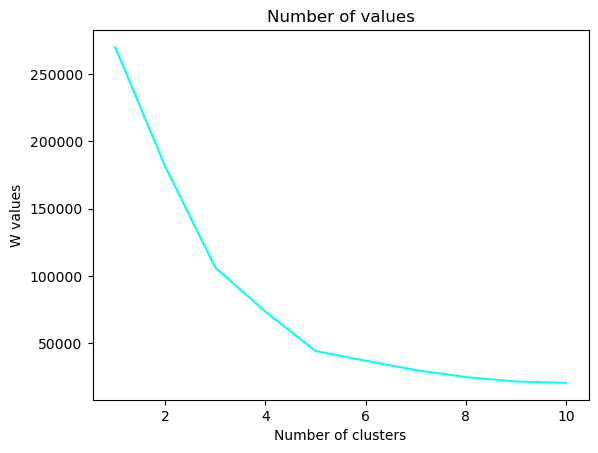

In [60]:
plt.plot(range(1,11),wcss, color= 'cyan')
plt.title('Number of values')
plt.xlabel('Number of clusters')
plt.ylabel('W values')
plt.show()

In [9]:
kmeansmodel= KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [10]:
y_kmeans= kmeansmodel.fit_predict(X)

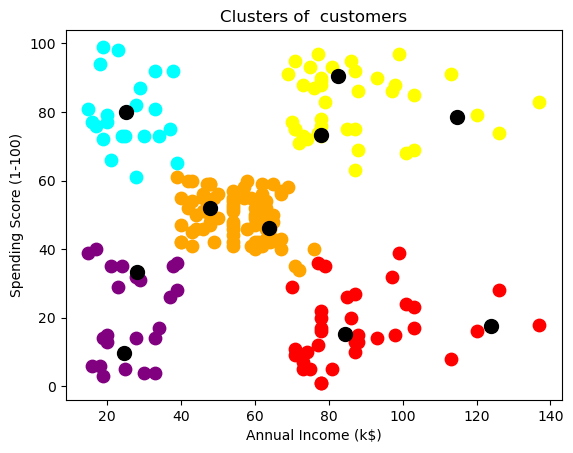

In [62]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 80, c = 'red', label= 'Customer_1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 80, c = 'orange', label= 'Customer_2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 80, c = 'yellow', label= 'Customer_3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 80, c = 'cyan', label= 'Customer_4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 80, c = 'purple', label= 'Customer_5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label= 'Centroids')
plt.title('Clusters of  customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()